In [621]:
# Importing needed libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# %matplotlib inline
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import warnings
warnings.filterwarnings('ignore')

In [622]:
# Importing and loading data

data = pd.read_csv("C:/Users/Idris/OneDrive/Documents/Azure DS/real_estate.csv")
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [623]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [624]:
data.shape

(414, 7)

In [625]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [626]:
data.isnull().sum()

transaction_date            0
house_age                   0
transit_distance            0
local_convenience_stores    0
latitude                    0
longitude                   0
price_per_unit              0
dtype: int64

Lets Identify the Numerical and Categorical Variables

In [627]:
# numerical columns
num_col = data.select_dtypes("number").drop("transaction_date", axis = 1).columns
num_col

Index(['house_age', 'transit_distance', 'local_convenience_stores', 'latitude',
       'longitude', 'price_per_unit'],
      dtype='object')

In [628]:
# categorical columns
cat_col = data.select_dtypes("object").columns
cat_col

Index([], dtype='object')

Lets take care of the transaction date column

In [629]:
data["Year"] = data["transaction_date"].astype(str).str.split(".", expand = True)[0]
data["Month"] = data["transaction_date"].astype(str).str.split(".", 
                                                               expand = True)[1].astype(str).str[0].astype(int) + 1

data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,Year,Month
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,10
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,10
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9


Lets Convert Month Number to Month Name

In [630]:
import calendar
data["MonthName"] = data["Month"].apply(lambda row: calendar.month_name[row])
data

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,Year,Month,MonthName
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,2012,10,October
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,2012,10,October
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,2013,6,June
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6,June
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,2012,9,September
...,...,...,...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,1,January
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0,2012,7,July
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6,2013,3,March
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5,2013,1,January


Lets Concatenate Year and Month Name and drop the created columns

In [631]:
data["transactionDate"] = data["Year"] + " " + data["MonthName"]
data = data.drop(["Year", "Month", "MonthName", "transaction_date"], axis = 1)
data.head()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit,transactionDate
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012 October
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012 October
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013 June
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013 June
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012 September


Rearrange the columns

In [632]:
# data = data[[c for c in data if c not in ["transactionDate", "transit_distance"]] + ["transactionDate", "transit_distance"]]
# data

first_column = data.pop("transactionDate")
data.insert(0, 'transactionDate', first_column)
data.head()

,transactionDate,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012 October,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012 October,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013 June,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013 June,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012 September,5.0,390.56840,5,24.97937,121.54245,43.1


Lets Check the distribution of the Numerical Variables

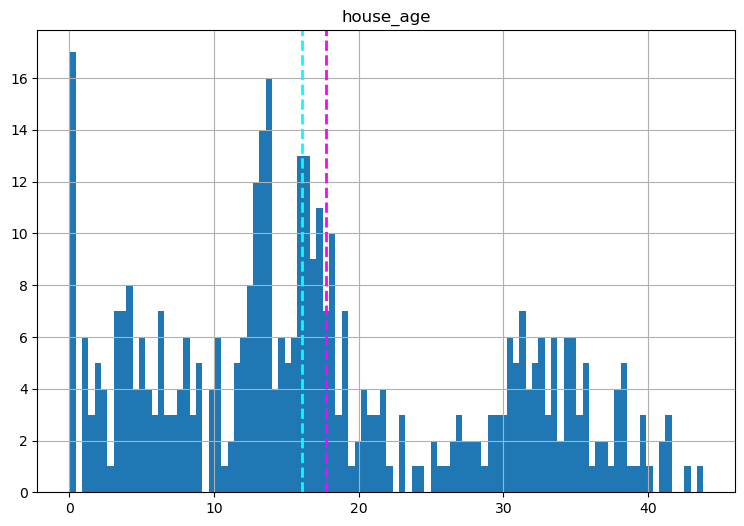

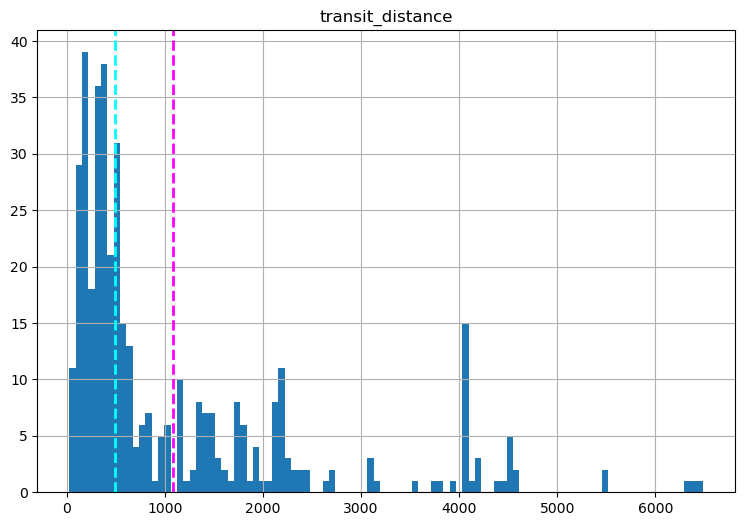

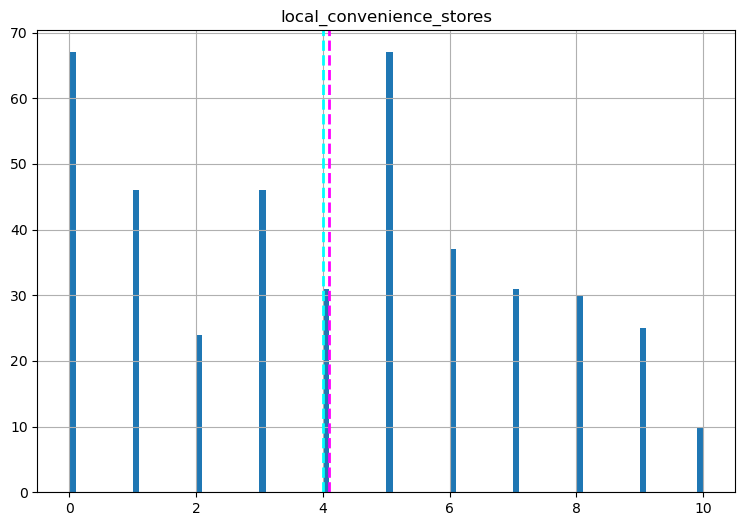

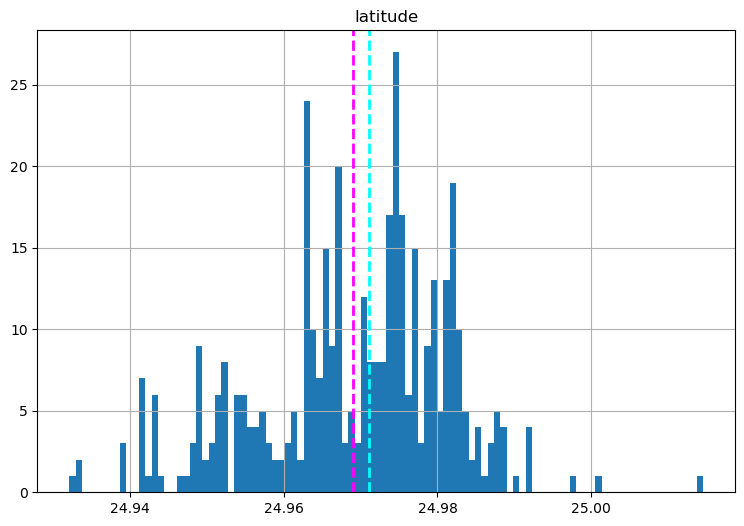

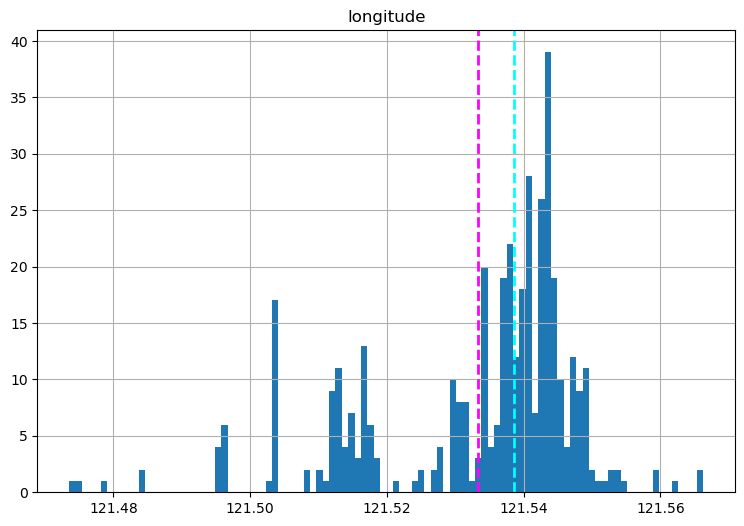

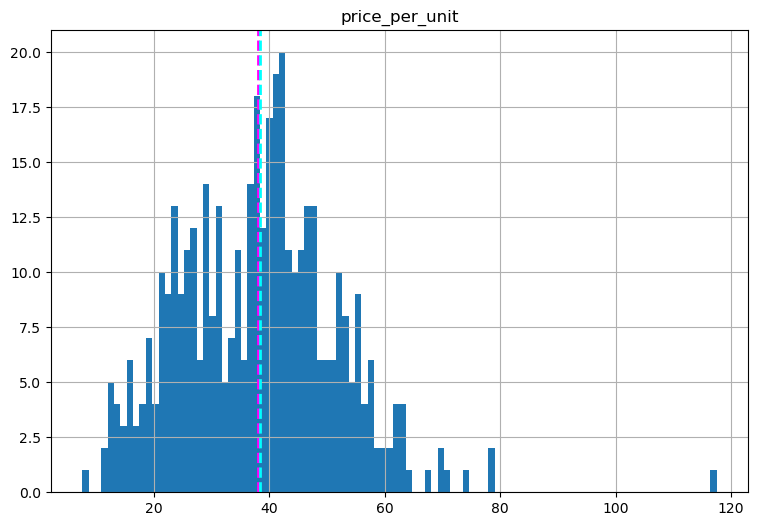

In [633]:
# Plot a histogram for each numeric feature
for col in num_col:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

We can notice a SKEW in price per unit as well as transit distance. Lets investigate properly

In [634]:
def show_distribution(var):

    # Get statistics
    min_val = data[var].min()
    max_val = data[var].max()
    mean_val = data[var].mean()
    med_val = data[var].median()
    mod_val = data[var].mode()[0]


    print("Minimum: {:.2f}\nMaximum: {:.2f}\nMean: {:.2f}\nMedian: {:.2f}\nMode: {:.2f}\n".format(
    min_val, max_val, mean_val, med_val, mod_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (9,12))

    # plot an histogram
    ax[0].hist(data[var])
    ax[0].set_ylabel('Frequency')
    ax[0].set_xlabel(var)

    # Add lines for the statistics
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

 

    # Add a title to the Figure
    fig.suptitle('Data Distribution of ' + var)
    
    # create boxplot
    ax[1].boxplot(data[var], vert = False)
    ax[1].set_xlabel(var)

    
    # Show the figure
    fig.show()

Distribution of price_per_unit

Minimum: 7.60
Maximum: 117.50
Mean: 37.98
Median: 38.45
Mode: 24.70

Distribution of transit_distance

Minimum: 23.38
Maximum: 6488.02
Mean: 1083.89
Median: 492.23
Mode: 289.32



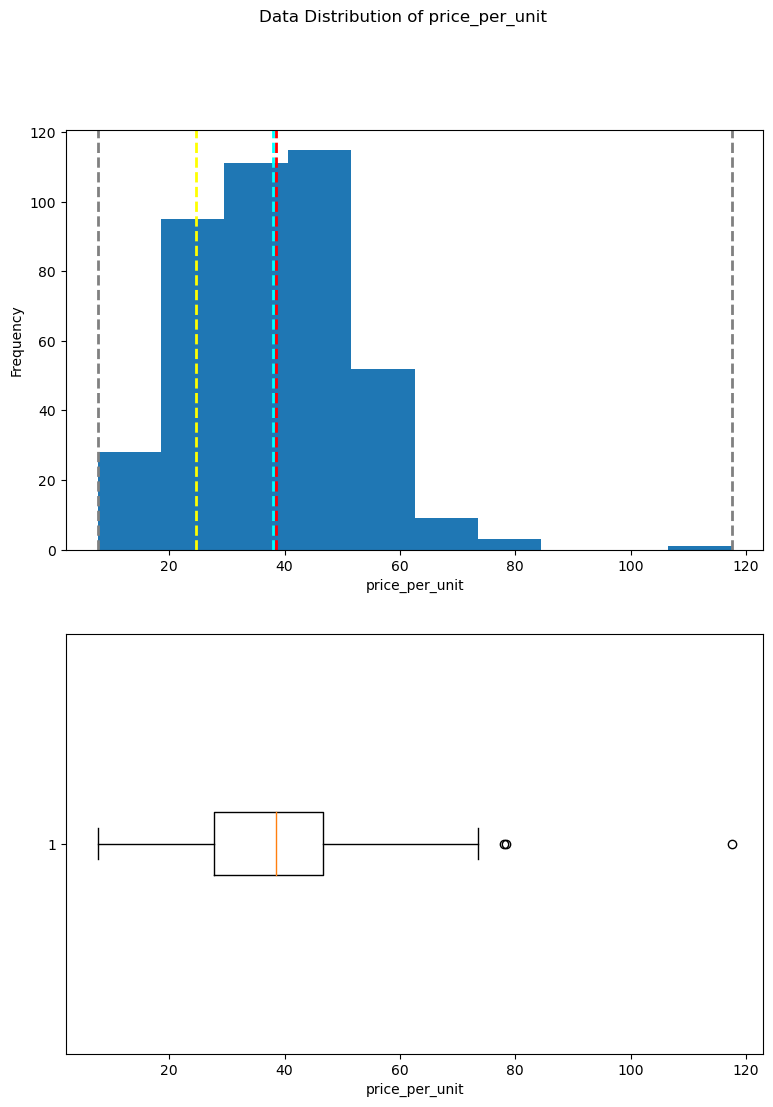

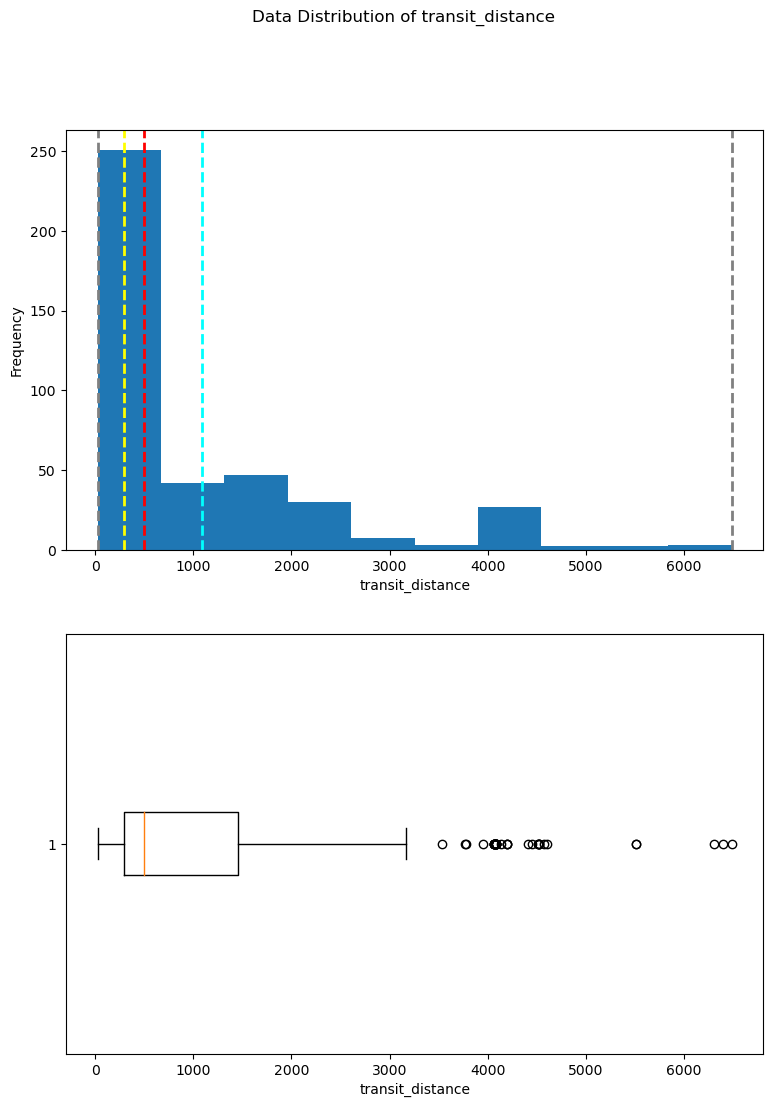

In [635]:
for i in ["price_per_unit", "transit_distance"]:
    print ("Distribution of {}\n".format(i))
    show_distribution(i)

In [636]:
def what_quantiles(var):
    quantiles = [1, 5, 10, 25, 75, 90, 95, 99]
    for i in quantiles:
        n_quantile = data[var].quantile(i/100)
        print("{}th Quantile: {}".format(i, n_quantile))
    

for i in ["price_per_unit", "transit_distance"]:
    print("Quantiles for: {}".format(i))
    what_quantiles(i)
    print("\n")

Quantiles for: price_per_unit
1th Quantile: 12.8
5th Quantile: 16.490000000000002
10th Quantile: 21.02
25th Quantile: 27.7
75th Quantile: 46.6
90th Quantile: 54.94
95th Quantile: 59.17499999999998
99th Quantile: 70.88300000000001


Quantiles for: transit_distance
1th Quantile: 56.47425
5th Quantile: 90.45606
10th Quantile: 157.6052
25th Quantile: 289.3248
75th Quantile: 1454.279
90th Quantile: 2697.6626999999994
95th Quantile: 4082.015
99th Quantile: 5394.220430000004




Now that we saw the quantiles, lets take off the outliers for "transit_distance"

In [637]:
# low, high = df["surface_covered_in_m2"].quantile([0.1, 0.9])
ppu_q99 = data["price_per_unit"].quantile(0.99)
td_q99 = data["transit_distance"].quantile(0.99)

data = data[(data["price_per_unit"] < ppu_q99) & (data["transit_distance"] < td_q99)]
data.shape

(404, 7)

Minimum: 23.38
Maximum: 4605.75
Mean: 1032.60
Median: 492.23
Mode: 289.32



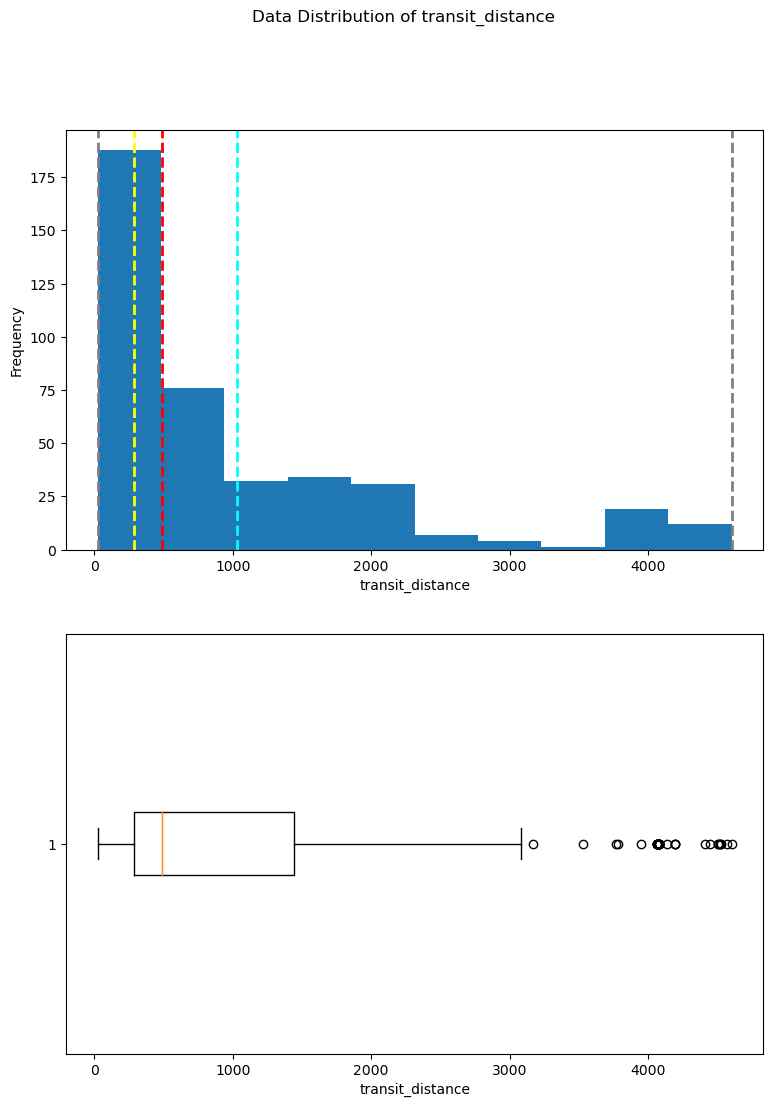

In [638]:
show_distribution("transit_distance")

Minimum: 7.60
Maximum: 70.10
Mean: 37.70
Median: 38.45
Mode: 24.70



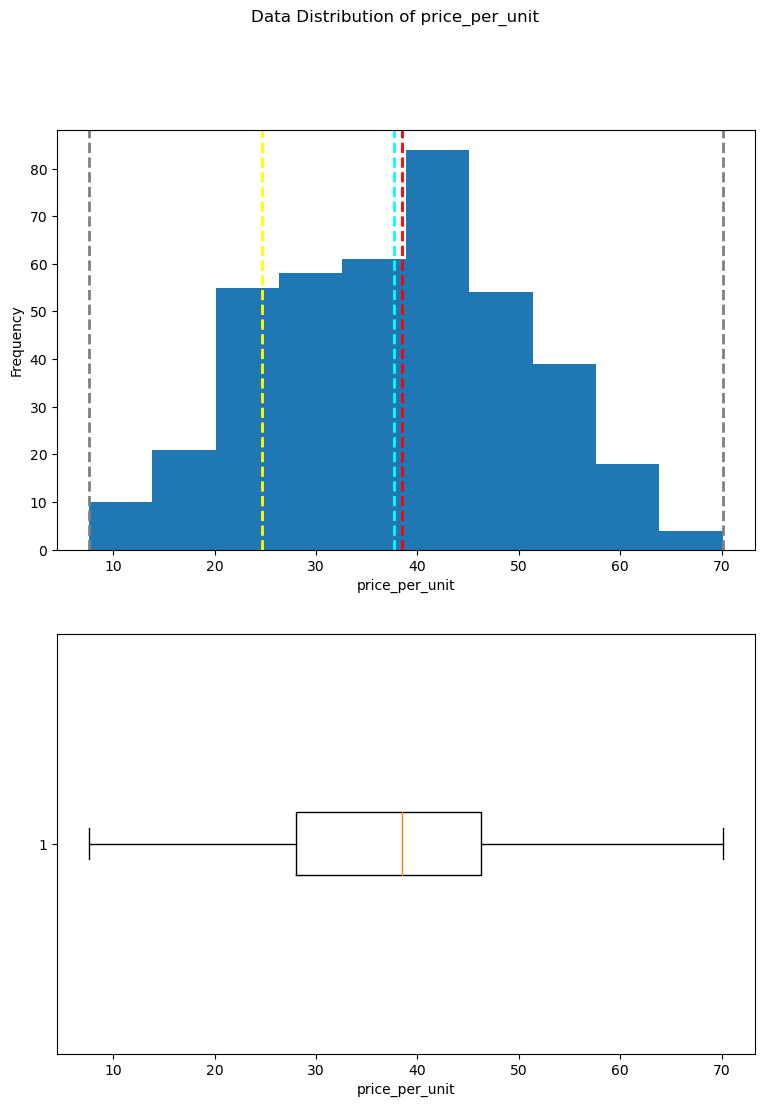

In [639]:
show_distribution("price_per_unit")

Now that we cleaned our data, lets take a final look at distribution

In [640]:
data.describe()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,17.624010,1032.600310,4.106436,24.969161,121.533940,37.700000
std,11.323341,1146.323406,2.934531,0.012383,0.014268,12.385315
min,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,8.975000,289.324800,1.000000,24.963050,121.529728,28.000000
50%,16.050000,492.231300,4.000000,24.971100,121.538675,38.450000
75%,27.525000,1440.755750,6.000000,24.978200,121.543352,46.250000
max,43.800000,4605.749000,10.000000,25.014590,121.566270,70.100000


Lets see how the features correalate with the label "Price_per_unit"

In [641]:
data.corr()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
house_age,1.000000,-0.008656,0.050643,0.073767,-0.020644,-0.218132
transit_distance,-0.008656,1.000000,-0.619271,-0.590060,-0.767681,-0.702315
local_convenience_stores,0.050643,-0.619271,1.000000,0.435652,0.439314,0.601984
latitude,0.073767,-0.590060,0.435652,1.000000,0.388549,0.562233
longitude,-0.020644,-0.767681,0.439314,0.388549,1.000000,0.529423
price_per_unit,-0.218132,-0.702315,0.601984,0.562233,0.529423,1.000000


<AxesSubplot:>

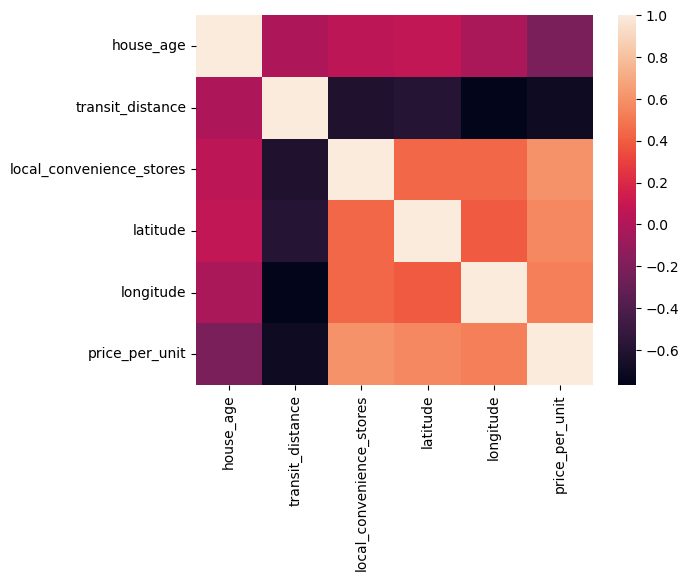

In [642]:
sns.heatmap(data.corr())

We can see that "local_convenience_stores", "latitude", "longitude" and "transit_distance" both have high correlation with the price_per_unit which means they are important features. Lets visualize the correlation of these features and the price per unit 

## Price and Location

Lets Visualize price and the locationn (longitude and latitude) features

In [643]:
fig = px.scatter_mapbox(
    data,  # Our DataFrame
    lat= "latitude",
    lon= "longitude",
    width=600,  # Width of map
    height=600,  # Height of map
    color= "price_per_unit",
    hover_data=["price_per_unit"],  # Display price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

We could also do a 3D representation since we have 3 features; longitude on y-axis, latitude on x-axis and price_per_unit on z-axis

In [644]:
# Create 3D scatter plot
fig = px.scatter_3d(
    data,
    x= "latitude",
    y= "longitude",
    z= "price_per_unit",
    labels={"longitude": "longitude", "latitude": "latitude", "price_per_unit": "price"},
    width=600,
    height=500,
)

# Refine formatting
fig.update_traces(
    marker={"size": 4, "line": {"width": 2, "color": "DarkSlateGrey"}},
    selector={"mode": "markers"},
)

# Display figure
fig.show()

## Price and Local Stores

Lets Visualize price and the local stores features

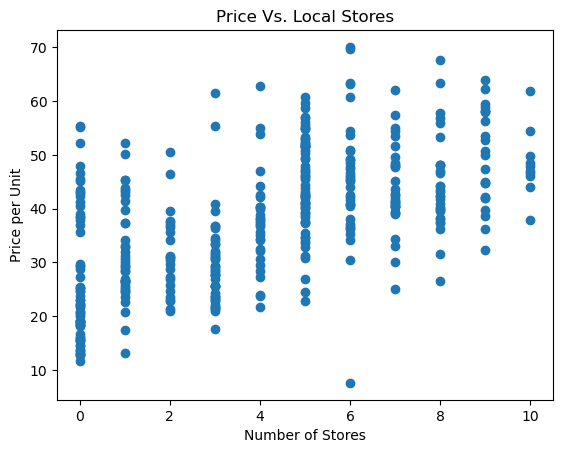

In [645]:
plt.scatter(x = data["local_convenience_stores"], y = data["price_per_unit"])
plt.xlabel("Number of Stores")
plt.ylabel("Price per Unit")
plt.title("Price Vs. Local Stores");

## Price and Transit Distance 

Lets Visualize price per unit and the transit distance

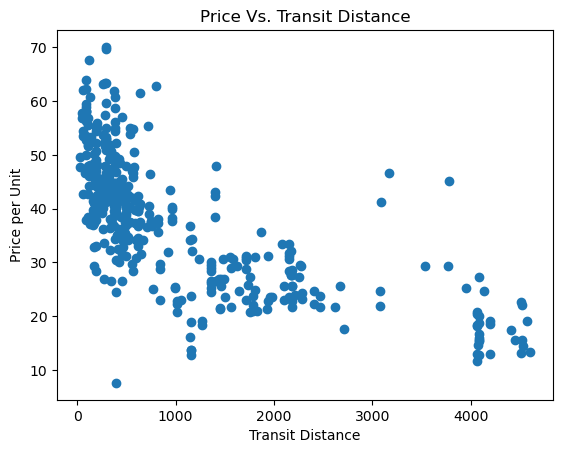

In [646]:
plt.scatter(x = data["transit_distance"], y = data["price_per_unit"])
plt.xlabel("Transit Distance")
plt.ylabel("Price per Unit")
plt.title("Price Vs. Transit Distance");

## Data Preprocessing

In [647]:
data.describe()

,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,17.624010,1032.600310,4.106436,24.969161,121.533940,37.700000
std,11.323341,1146.323406,2.934531,0.012383,0.014268,12.385315
min,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,8.975000,289.324800,1.000000,24.963050,121.529728,28.000000
50%,16.050000,492.231300,4.000000,24.971100,121.538675,38.450000
75%,27.525000,1440.755750,6.000000,24.978200,121.543352,46.250000
max,43.800000,4605.749000,10.000000,25.014590,121.566270,70.100000


In [648]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transactionDate           404 non-null    object 
 1   house_age                 404 non-null    float64
 2   transit_distance          404 non-null    float64
 3   local_convenience_stores  404 non-null    int64  
 4   latitude                  404 non-null    float64
 5   longitude                 404 non-null    float64
 6   price_per_unit            404 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.2+ KB


We see in our data that the features are not in similar scale. e.g the transit distance and local stores

In [649]:
# Define preprocessing for numeric columns (scale them)
numeric_features = [0, 1, 2, 3, 4]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])


# Create Preprocessor step
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ])

# Create Preprocessing and training pipeline
pipeline = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
     ])

## Split Data 

Lets create the feature matrix "X_train" and target vector "y_train" which is "price_per_unit"

In [650]:
target = "price_per_unit"
features_location = ["house_age", "transit_distance", "latitude", "longitude", "local_convenience_stores"]
X = data[features_location]
y = data[target]

In [651]:
# Split data into train and tests
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state= 0)
print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 282 rows
Test Set: 122 rows


## Build Models

Let's try a couple of models to determine the optimal model. We start with Linear Regression:

### Linear Regression 

In [652]:
# Train the model
model = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
     ])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', LinearRegression())])

In [653]:
# Evaluate the model
predictions = model.predict(X_test)
print("Predicted Lables: ", predictions[:10])
print("Actual Lables: ", y_test[:10])

Predicted Lables:  [51.14516814 44.92708594 47.76744229 44.52988892 42.74705781 45.46279806
 44.43200293 44.1036652  40.1166659  44.35161591]
Actual Lables:  410    50.0
243    48.2
61     63.2
235    39.3
137    47.4
305    55.0
316    42.0
268    40.1
311    42.2
103    45.7
Name: price_per_unit, dtype: float64


## Evaluate Models 

To better compare the predicted and actual values, lets visualize the points with a scatter plot

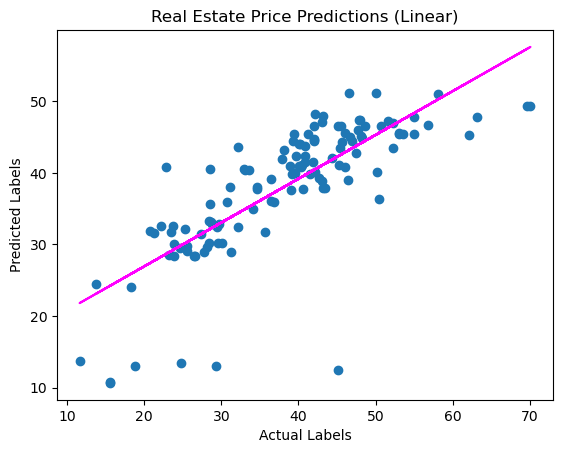

In [654]:
# Creating a scatter plot 
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Linear)')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [655]:
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)

MSE: 51.57183338793226
RMSE: 7.181353172483043
R2: 0.609168074414183


The RMSE is at 7.18 which is still above our target of 7. Lets try another type of linear regression model

### Lasso algorithm

In [656]:
# Train the model
model_lasso = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", Lasso())
     ])

model_lasso.fit(X_train, y_train)
print(model_lasso)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', Lasso())])


In [657]:
# Evaluate the model
predictions_lasso = model_lasso.predict(X_test)
print("Predicted Lables: ", predictions_lasso[:10])
print("Actual Lables: ", y_test[:10])

Predicted Lables:  [48.53418543 44.69868201 45.65853373 43.43151591 41.97892115 44.27704304
 43.37092802 43.16931232 40.07091521 42.75689752]
Actual Lables:  410    50.0
243    48.2
61     63.2
235    39.3
137    47.4
305    55.0
316    42.0
268    40.1
311    42.2
103    45.7
Name: price_per_unit, dtype: float64


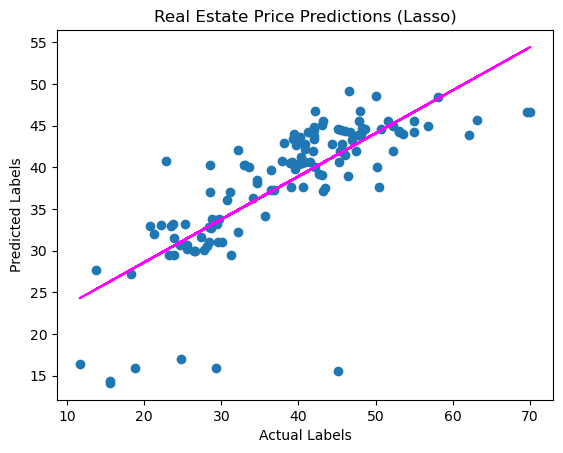

In [658]:
# Creating a scatter plot 
plt.scatter(y_test, predictions_lasso)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Lasso)')
# overlay the regression line
z = np.polyfit(y_test, predictions_lasso, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [659]:
mse = mean_squared_error(y_test, predictions_lasso)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions_lasso)
print("R2:", r2)

MSE: 55.26871325714076
RMSE: 7.4342930569853625
R2: 0.5811516440679176


The Linear regression model performed better than the Lasso. Can we try out more algorithms?

### Decision Tree

In [660]:
# Train the model
model_DT = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", DecisionTreeRegressor())
     ])

model_DT.fit(X_train, y_train)
print(model_DT, "\n")

# Visualize the model tree
# tree = export_text(model_DT)
# print(tree)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', DecisionTreeRegressor())]) 



In [661]:
# Evaluate the model
predictions_DT = model_DT.predict(X_test)
print("Predicted Lables: ", predictions_lasso[:10])
print("Actual Lables: ", y_test[:10])

Predicted Lables:  [48.53418543 44.69868201 45.65853373 43.43151591 41.97892115 44.27704304
 43.37092802 43.16931232 40.07091521 42.75689752]
Actual Lables:  410    50.0
243    48.2
61     63.2
235    39.3
137    47.4
305    55.0
316    42.0
268    40.1
311    42.2
103    45.7
Name: price_per_unit, dtype: float64


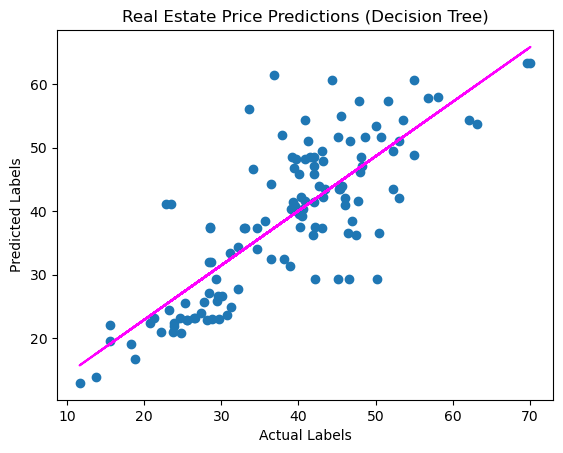

In [662]:
# Creating a scatter plot 
plt.scatter(y_test, predictions_DT)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Decision Tree)')
# overlay the regression line
z = np.polyfit(y_test, predictions_DT, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [663]:
mse = mean_squared_error(y_test, predictions_DT)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions_DT)
print("R2:", r2)

MSE: 54.534446721311475
RMSE: 7.384744187939855
R2: 0.5867162087777411


The Decision tree seem to perform worse than the Linear Regression but better than lasso. Lets try an esemble algorithm (bagging) that works on base model (trees) to produce an optimized model

### Random Forest

In [664]:
# Train the model
model_RF = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor())
     ])

model_RF.fit(X_train, y_train)
print(model_RF, "\n")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', RandomForestRegressor())]) 



In [665]:
# Evaluate the model
predictions_RF = model_RF.predict(X_test)
print("Predicted Lables: ", predictions_RF[:10])
print("Actual Lables: ", y_test[:10])

Predicted Lables:  [54.0186     40.94       54.5506     42.7605     45.40375    49.1018
 42.1395     42.184      43.254      46.48823333]
Actual Lables:  410    50.0
243    48.2
61     63.2
235    39.3
137    47.4
305    55.0
316    42.0
268    40.1
311    42.2
103    45.7
Name: price_per_unit, dtype: float64


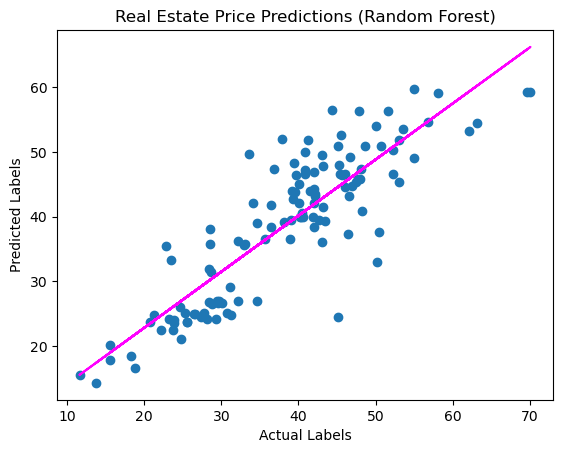

In [666]:
# Creating a scatter plot 
plt.scatter(y_test, predictions_RF)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Random Forest)')
# overlay the regression line
z = np.polyfit(y_test, predictions_RF, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [667]:
mse = mean_squared_error(y_test, predictions_RF)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions_RF)
print("R2:", r2)

MSE: 33.95056386934179
RMSE: 5.826711239570895
R2: 0.7427090840077823


The Random Forest performed better than all previous models with a better R-squared value as well as lower RMSE (5.86) which is really lower than our target RMSE. Let's try another ensemble algorithm (boosting)

### Gradient Boosting 

In [668]:
# Train the model
model_GB = Pipeline(steps= [
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor())
     ])

model_GB.fit(X_train, y_train)
print(model_GB, "\n")

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])])),
                ('regressor', GradientBoostingRegressor())]) 



In [669]:
# Evaluate the model
predictions_GB = model_GB.predict(X_test)
print("Predicted Lables: ", predictions_GB[:10])
print("Actual Lables: ", y_test[:10])

Predicted Lables:  [56.10775544 41.43057609 53.3166352  45.87646432 46.77636179 48.9993081
 45.87646432 42.09038018 40.31435782 46.08957936]
Actual Lables:  410    50.0
243    48.2
61     63.2
235    39.3
137    47.4
305    55.0
316    42.0
268    40.1
311    42.2
103    45.7
Name: price_per_unit, dtype: float64


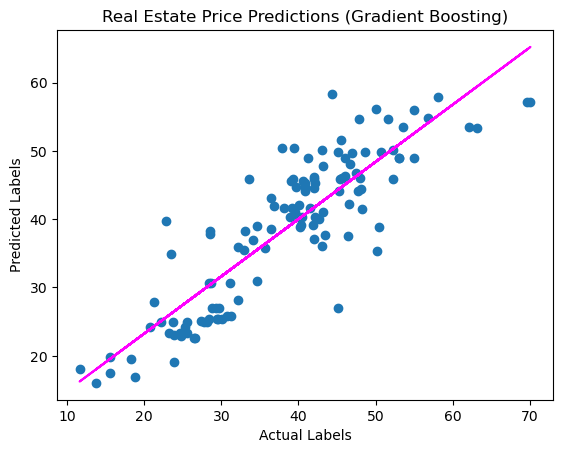

In [670]:
# Creating a scatter plot 
plt.scatter(y_test, predictions_GB)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Gradient Boosting)')
# overlay the regression line
z = np.polyfit(y_test, predictions_GB, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [671]:
mse = mean_squared_error(y_test, predictions_GB)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions_GB)
print("R2:", r2)

MSE: 32.29933715102162
RMSE: 5.683250579643802
R2: 0.755222738758921


The gradient boosting perfomed better than all previous algorithms with an impressive RMSE 5.69 and R2 of 0.75. So, can we improve the ensemble algorithms score by tuning hyperparameters?

In [672]:
model_tuning = Pipeline(steps= [
    ("preprocessor", preprocessor)
     ])

model_tuning.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4])]))])

In [673]:
X_train_tuning = StandardScaler().fit_transform(X_train)
                                                
X_test_tuning = StandardScaler().fit_transform(X_test)

Best parameter combination: {'learning_rate': 0.15, 'n_estimators': 50} 

GradientBoostingRegressor(learning_rate=0.15, n_estimators=50) 

MSE: 38.30271665970506
RMSE: 6.1889188603265
R2: 0.7097267340745068


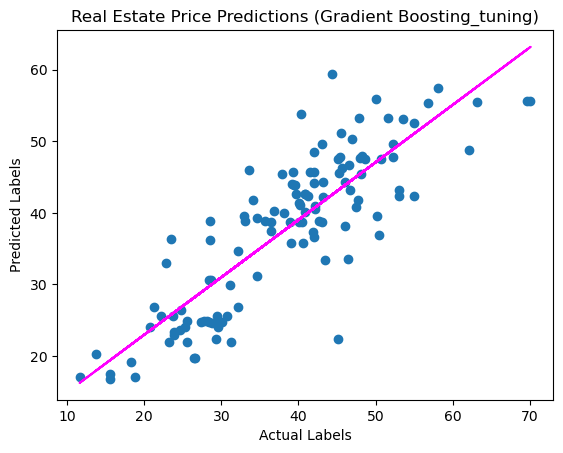

In [674]:
# Optimize HyperParameters

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()


# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.15, 0.5, 1.0],
 'n_estimators' : [50, 100, 150, 200]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train_tuning, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model_optimal_gb=gridsearch.best_estimator_
print(model_optimal_gb, "\n")

# Evaluate the model using the test data
predictions_optimal_gb = model_optimal_gb.predict(X_test_tuning)
mse = mean_squared_error(y_test, predictions_optimal_gb)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_optimal_gb)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions_optimal_gb)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Gradient Boosting_tuning)')
# overlay the regression line
z = np.polyfit(y_test, predictions_optimal_gb, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameter combination: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 120, 'bootstrap': True} 

RandomForestRegressor(max_depth=120, max_features='sqrt') 

MSE: 34.314317602060285
RMSE: 5.857842401606609
R2: 0.7399524131186946


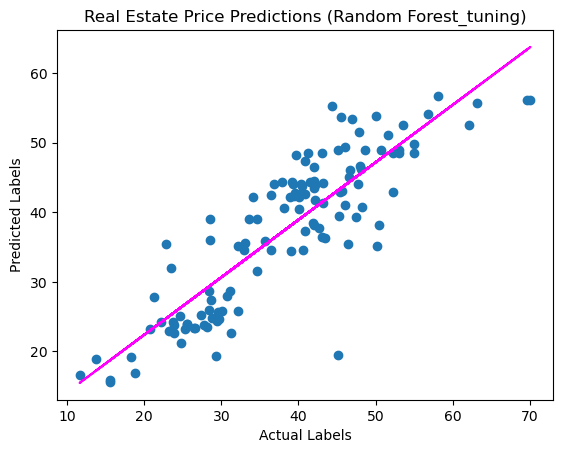

In [675]:
# Optimize HyperParameters

# Use a RandomForest algorithm
alg = RandomForestRegressor()

# Try these hyperparameter values

n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

# Find the best hyperparameter combination to optimize the R2 metric
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator = alg,
                               param_distributions = random_grid,
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               random_state=35, 
                               n_jobs = -1)

rf_random.fit(X_train_tuning, y_train)

print("Best parameter combination:", rf_random.best_params_, "\n")

# Get the best model
model_optimal_rf = rf_random.best_estimator_
print(model_optimal_rf, "\n")

# Evaluate the model using the test data
predictions_optimal_rf = model_optimal_rf.predict(X_test_tuning)
mse = mean_squared_error(y_test, predictions_optimal_rf)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions_optimal_rf)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions_optimal_rf)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Real Estate Price Predictions (Random Forest_tuning)')
# overlay the regression line
z = np.polyfit(y_test, predictions_optimal_rf, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')

With a RMSE of 5.69 and R-Squared of 0.75, the Gradient Boost model produces the best model.

## Save Job

In [676]:
# Save the model as a pickle file
filename = './rentals.pkl'
joblib.dump(model_GB, filename)

['./rentals.pkl']

In [677]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [16.2, 289.3248, 5.0, 24.98203, 121.54348]
Prediction: 40 rentals


OR BUILD A FUNCTION TO MAKE PREDICTION

In [678]:
def make_prediction(transaction_date, house_age, transit_distance, local_convenience_stores, latitude, longitude):
    
    data = {
        "transaction_date": transaction_date,
        "house_age": house_age,
        "transit_distance": transit_distance,
        "local_convenience_stores": local_convenience_stores,
        "latitude": latitude,
        "longitude": longitude}
    
    df = np.array([[house_age, transit_distance, local_convenience_stores, latitude, longitude]]).astype('float64')
#     df = pd.DataFrame(data, index = [0]).drop("transaction_date", axis = 1, inplace = True)
    prediction = model_GB.predict(df).round(2)[0]
    return f"Predicted apartment price: ${prediction}"

In [679]:
make_prediction(2013.167, 16.2, 289.3248, 5, 24.98203, 121.54348)

'Predicted apartment price: $40.19'